In [ ]:
# !wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/straight-curly-data/data.zip
# !unzip data.zip

## Import Libraries

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

2024-11-30 04:15:44.315439: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-30 04:15:44.332911: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-30 04:15:44.338077: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-30 04:15:44.350843: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-30 04:15:45.107973: W tensorflow/compiler/tf2

In [2]:
print("TensorFlow version:", tf.__version__)
print("Available GPUs:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.17.1
Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


I0000 00:00:1732914950.234616   27563 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1732914950.287843   27563 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1732914950.291274   27563 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


## Data Preparation

The dataset contains around 1000 images of hairs in the separate folders for training and test sets.

In [3]:
train_dir = './data/train'
test_dir = './data/test'

## Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

* The shape for input should be `(200, 200, 3)`
* Next, create a convolutional layer (`Conv2D`):
    * Use 32 filters
    * Kernel size should be `(3, 3) `(that's the size of the filter)
    * Use `'relu'` as activation
* Reduce the size of the feature map with max pooling (`MaxPooling2D`)
    * Set the pooling size to `(2, 2)`
* Turn the multi-dimensional result into vectors using a `Flatten` layer
* Next, add a Dense layer with 64 neurons and `'relu'` activation
* Finally, create the `Dense` layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use `SGD` with the following parameters:

* `SGD(lr=0.002, momentum=0.8)`

In [4]:

def make_model(input_size=200):
    # Define the input
    inputs = keras.Input(shape=(input_size, input_size, 3))

    # Add convolutional layer
    conv = keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)

    # Add pooling layer
    features = keras.layers.MaxPooling2D((2, 2))(conv)

    # Flatten the output
    vectors = keras.layers.Flatten()(features)

    # Add dense layer
    inner = keras.layers.Dense(64, activation='relu')(vectors)

    # Add output layer
    outputs = keras.layers.Dense(1, activation='sigmoid')(inner)

    # Create and return the model
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [5]:
input_size = 200
model = make_model(input_size)

I0000 00:00:1732914953.309087   27563 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1732914953.312345   27563 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1732914953.314825   27563 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1732914953.470777   27563 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [6]:
# Optimizer
learning_rate=0.002
optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.8)

## Question 1

Since we have a binary classification problem, what is the best loss function for us?

* mean squared error
* binary crossentropy
* categorical crossentropy
* cosine similarity

> Note: since we specify an activation for the output layer, we don't need to set from_logits=True

In [7]:
# Loss function
loss = keras.losses.BinaryCrossentropy()

In [8]:
# Compile the model
model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['accuracy']
    )

## Question 2

What's the total number of parameters of the model? You can use the `summary` method for that.

* 896
* 11214912
* 15896912
* 20072512


In [9]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 313632)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    20,072,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,073,473 (76.57 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

## Generators and Training

For the next two questions, use the following data generator for both train and test sets:

```python
ImageDataGenerator(rescale=1./255)
```

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/test directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`
* Use `shuffle=True` for both training and test sets.
* For training use `.fit()` with the following params:

```python
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
```

In [10]:
# Initialize the ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen =ImageDataGenerator(rescale=1./255)

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(input_size, input_size),
    batch_size=20,
    class_mode='binary',
    shuffle=True,
    )


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(input_size, input_size),
    batch_size=20,
    class_mode='binary',
    shuffle=True,
    )

Found 800 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


In [12]:
for data_batch, labels_batch in train_generator:
    print('Data batch shape:', data_batch.shape)
    print('Labels batch shape:', labels_batch.shape)
    break

Data batch shape: (20, 200, 200, 3)
Labels batch shape: (20,)


In [13]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10


I0000 00:00:1732914960.144531   27821 service.cc:146] XLA service 0x793e6c006a40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732914960.144567   27821 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2024-11-30 04:16:00.184480: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-30 04:16:00.294939: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8904


 3/40 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.4833 - loss: 0.6974

I0000 00:00:1732914961.708681   27821 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - accuracy: 0.5686 - loss: 0.6944 - val_accuracy: 0.6219 - val_loss: 0.6418
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.6978 - loss: 0.5815 - val_accuracy: 0.6368 - val_loss: 0.6121
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.7029 - loss: 0.5627 - val_accuracy: 0.6368 - val_loss: 0.6285
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.6828 - loss: 0.5709 - val_accuracy: 0.6418 - val_loss: 0.6104
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.7486 - loss: 0.5055 - val_accuracy: 0.6766 - val_loss: 0.5904
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.7714 - loss: 0.5032 - val_accuracy: 0.6617 - val_loss: 0.6213
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.7809 - loss: 0.4874 - val_accuracy: 0.6816 - val_loss: 0.5988
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.7980 - loss: 0.4395 - val_accuracy: 0.6617 - val_los

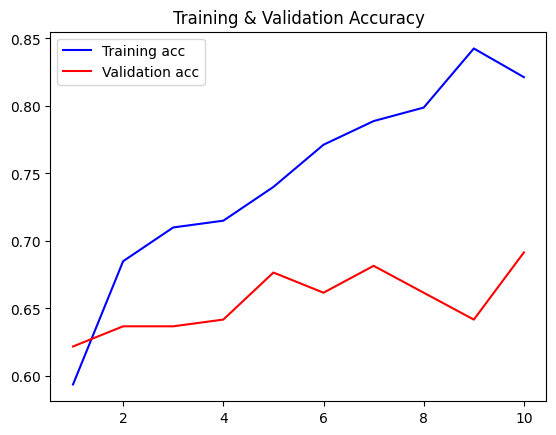

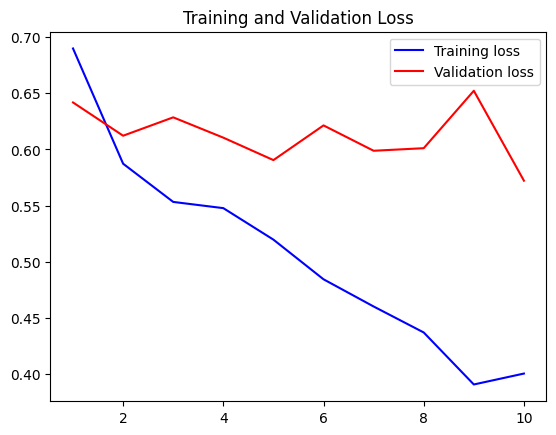

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label="Training acc")
plt.plot(epochs, val_acc, 'r', label="Validation acc")
plt.title('Training & Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

## Question 3

What is the median of training accuracy for all the epochs for this model?

* 0.10
* 0.32
* 0.50
* 0.72

In [15]:
acc_median = np.median(acc)
print("Median training accuracy:", acc_median)

Median training accuracy: 0.7556250095367432


## Question 4

What is the standard deviation of training loss for all the epochs for this model?

* 0.028
* 0.068
* 0.128
* 0.168

In [16]:
loss_std = np.std(loss)
print("Standard deviation of loss:", loss_std)

Standard deviation of loss: 0.08735150786375247


## Data Augmentation

For the next two questions, we'll generate more data using data augmentations.

Add the following augmentations to your training data generator:

* rotation_range=50,
* width_shift_range=0.1,
* height_shift_range=0.1,
* zoom_range=0.1,
* horizontal_flip=True,
* fill_mode='nearest'

In [17]:
datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

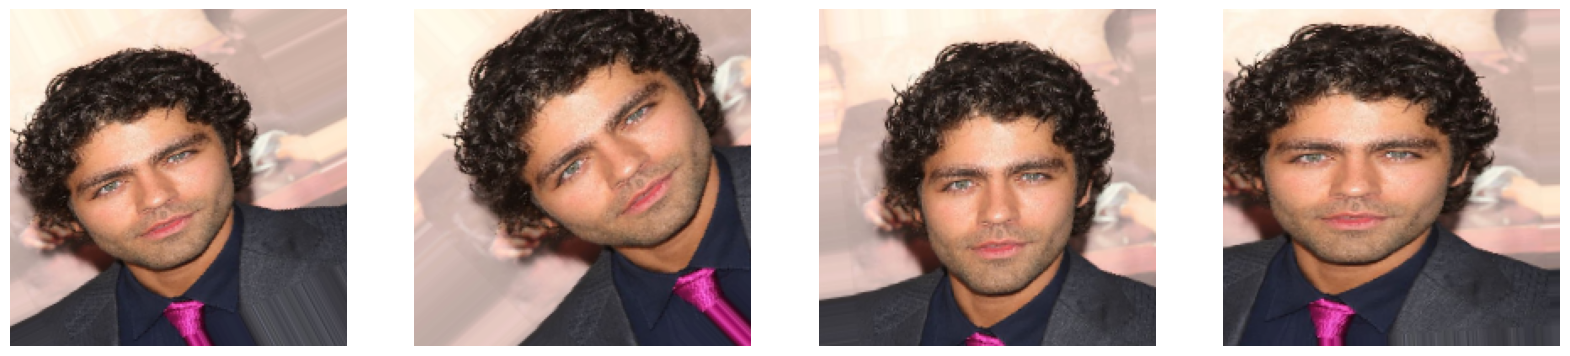

In [19]:
fnames = [os.path.join(train_dir+"/curly", fname) for fname in os.listdir(train_dir+"/curly")]

img_path = fnames[0]
img = image.load_img(img_path, target_size=(200, 200))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

# Prepare the plot
fig, axes = plt.subplots(1, 4, figsize=(20, 20))  # Create 1 row with 4 columns for subplots

i = 0
for batch in datagen.flow(x, batch_size=1):
    axes[i].imshow(image.array_to_img(batch[0]))  # Display augmented image on the current axis
    axes[i].axis('off')  # Turn off axis for better visualization
    i += 1
    if i == 4:
        break  # Stop after 4 images

plt.show()

## Question 5

Let's train our model for 10 more epochs using the same code as previously.

> Note: make sure you don't re-create the model - we want to continue training the model we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

* 0.26
* 0.56
* 0.86
* 1.16


In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(input_size, input_size),
    batch_size=20,
    class_mode='binary',
    shuffle=True,
    )


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(input_size, input_size),
    batch_size=20,
    class_mode='binary',
    shuffle=True,
    )

Found 800 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


In [22]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 200ms/step - accuracy: 0.6624 - loss: 0.6524 - val_accuracy: 0.6816 - val_loss: 0.6050
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 202ms/step - accuracy: 0.7103 - loss: 0.5638 - val_accuracy: 0.6517 - val_loss: 0.6366
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 201ms/step - accuracy: 0.7246 - loss: 0.5651 - val_accuracy: 0.6667 - val_loss: 0.6349
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 200ms/step - accuracy: 0.6945 - loss: 0.5942 - val_accuracy: 0.7512 - val_loss: 0.5330
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 199ms/step - accuracy: 0.7053 - loss: 0.5569 - val_accuracy: 0.7363 - val_loss: 0.5649
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 205ms/step - accuracy: 0.7246 - loss: 0.5401 - val_accuracy: 0.7313 - val_loss: 0.5456
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 210ms/step - accuracy: 0.7019 - loss: 0.5678 - val_accuracy: 0.7264 - val_loss: 0.5562
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 207ms/step - accuracy: 0.7271 - loss: 0.5618 - val_accuracy: 0.

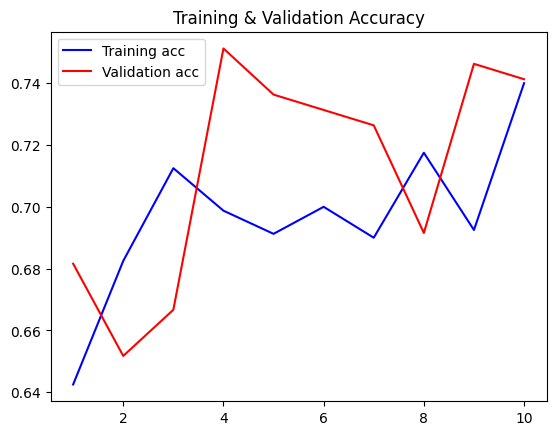

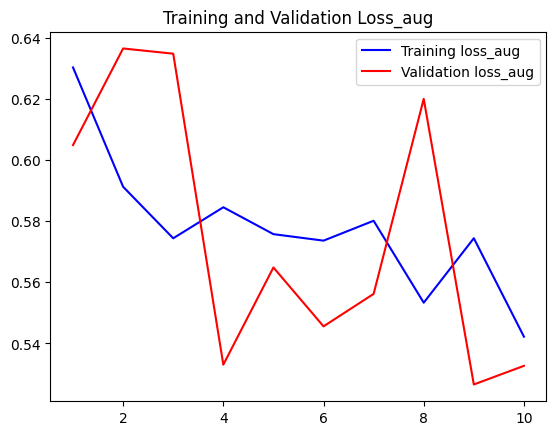

In [24]:
acc_aug = history.history['accuracy']
val_acc_aug = history.history['val_accuracy']
loss_aug = history.history['loss']
val_loss_aug = history.history['val_loss']

epochs = range(1, len(acc_aug) + 1)

plt.plot(epochs, acc_aug, 'b', label="Training acc")
plt.plot(epochs, val_acc_aug, 'r', label="Validation acc")
plt.title('Training & Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_aug, 'b', label='Training loss_aug')
plt.plot(epochs, val_loss_aug, 'r', label='Validation loss_aug')
plt.title('Training and Validation Loss_aug')
plt.legend()

plt.show()

In [25]:
loss_mean_aug = np.mean(val_loss)
print("Mean of loss with augmentation:", loss_mean_aug)

Mean of loss with augmentation: 0.6128645896911621


## Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

* 0.31
* 0.51
* 0.71
* 0.91


In [26]:
acc_mean_aug = np.mean(val_acc_aug[6:10])
print("Test accuracy from last 5 epoch with augmentation:", acc_mean_aug)

Test accuracy from last 5 epoch with augmentation: 0.7263681590557098
